In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
# loading data

In [3]:
sales = pd.read_csv('kc_house_data.csv')

In [4]:
# Data Exploration

In [5]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
sales.shape

(21613, 21)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [8]:
# split data into training and test data

In [9]:
from sklearn.cross_validation import train_test_split

In [10]:
X = sales.drop(labels='price',axis=1)
y = sales['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape,'\n',X_test.shape)

(17290, 20) 
 (4323, 20)


# Building a linear simple model

In [13]:
def SimpLinReg(Xi,Yi):
    
    n = len(Xi)
    Xmean = Xi.mean()
    Ymean = Yi.mean()

    SumYiXi    = (Yi*Xi).sum()
    SumYiXibyN = (Xi.sum()*Yi.sum())/n
    
    XiSq       = (Xi*Xi).sum()
    XiXibyN    = (Xi.sum() * Xi.sum())/n
    
    Wchap      = (SumYiXi-SumYiXibyN)/(XiSq - XiXibyN)
    intercept  = Ymean-(Wchap*Xmean)
    
    return(intercept,Wchap)

In [14]:
intercept,Wchap=SimpLinReg(Xi = sales['sqft_living'],Yi = sales['price'])
print(intercept,'\n',Wchap)

-43580.7430945 
 280.623567897


#### Predicting Values

In [15]:
def Yestimated(intercept,Wchap,feature):
    
    predicted_values = intercept + Wchap*feature
    
    return(predicted_values)

In [16]:
feature = 2650 #size of house
Yestimated(intercept,Wchap,feature)

700071.71183376387

#### Residual Sum of Squares , RSS

In [17]:
def RSS(intercept,Wchap,feature,output):
    
    predicted_values = intercept + Wchap*feature
    residuals        = output - predicted_values
    RSS              = (residuals*residuals).sum()
    
    return(RSS)

In [18]:
RSS(intercept,Wchap,X_train['sqft_living'],y_train)

1146684752398694.3

#### Predict the squarefeet given price

In [19]:
def InvRegPred(output, intercept, wchap):
    
    estimated_feature=(output-intercept)/wchap
    
    return estimated_feature

In [20]:
my_house_price = 800000
estimated_squarefeet = InvRegPred(my_house_price, intercept, Wchap)
print("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3006


# Builiding a Linair multiple model 

In [21]:
def LinMulReg(dataf,features,output):
    
    dataf['constant'] = 1 
    features = ['constant'] + features
    features_matrix = np.array(dataf[features])
    output_matrix   = np.array(dataf[output])
    
    Wchap =  features_matrix
    
    #INV(H'H)H'Y
    HprimH    = np.transpose(features_matrix).dot(features_matrix)
    InvHprimH = np.linalg.inv(HprimH)
    H         = InvHprimH.dot(np.transpose(features_matrix))
    Wechap    = H.dot(output_matrix)
    
    return(features_matrix ,output_matrix,Wechap)

In [22]:
features, output, Wechap = LinMulReg(sales,['sqft_living'],'price')
print(features.shape,'\n',output.shape,'\n', Wechap)

(21613, 2) 
 (21613,) 
 [-43580.74309447    280.6235679 ]


#### Predicting output given regression weights

In [23]:
def predict_output(feature_matrix, weights):
    
    predictions=np.dot(feature_matrix,weights)
    
    return(predictions)

In [24]:
my_weights = np.array([1., 1.]) 
predict_output(features, my_weights)

array([ 1181.,  2571.,   771., ...,  1021.,  1601.,  1021.])

#### Computing the Derivative

In [25]:
def feature_derivative(errors, feature):
    
    derivative=2*np.dot(errors,feature)
    
    return(derivative)

In [26]:
my_weights = np.array([0., 0.]) # this makes all the predictions 0
test_predictions = predict_output(features, my_weights) 

errors = test_predictions - output # prediction errors in this case is just the -example_output
feature = features[:,0]

derivative = feature_derivative(errors, feature)
print(derivative)
print(-np.sum(output)*2) # should be the same as derivative

-23345850016.0
-23345850016.0


# Gradient Descent method 2 

In [27]:
from math import sqrt

In [28]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # add the squared value of the derivative to the gradient magnitude (for assessing convergence)
            gradient_sum_squares += (derivative**2)
            # subtract the step size times the derivative from the current weight
            weights[i] -= (step_size * derivative)
        # compute the square-root of the gradient sum of squares to get the gradient matnigude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

#### Running simple regression

In [29]:
# let's test out the gradient descent
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output, Wechap ) = LinMulReg(sales,simple_features,my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

In [30]:
Wechap

array([-43580.74309447,    280.6235679 ])

In [31]:
test_weight = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
print(test_weight)

[-46999.88187784    281.99922246]


#### Running multiple regression

In [32]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(multiple_feature_matrix, output, Wechap) = LinMulReg(sales,model_features,my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [33]:
Wechap 

array([ -9.88630845e+04,   2.42215593e+02,   6.80410303e+01])

In [34]:
test_weight = regression_gradient_descent(multiple_feature_matrix, output, initial_weights, step_size, tolerance)
print(test_weight)

[ -9.99999615e+04   2.42150173e+02   6.86243523e+01]


# Multiple regression interpretation

#### Creating some new features

In [35]:
#adding more features 
sales['bedrooms_squared']=sales['bedrooms']*sales['bedrooms']
sales['bed_bath_rooms']=sales['bedrooms']*sales['bathrooms']
sales['log_sqft_living']=np.log(sales['sqft_living'])
sales['lat_plus_long']=sales['lat']+sales['long']

In [36]:
X = sales.drop(labels='price',axis=1)
y = sales['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
example_features = ['sqft_living', 'bedrooms', 'bathrooms']

In [39]:
X_train_temp = np.array(X_train[example_features])
y = np.array(y)

In [40]:
example_model = LinearRegression()
example_model.fit(X_train_temp,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print(example_model.intercept_)

69884.2955838


In [42]:
coeff_df = pd.DataFrame(example_model.coef_,
                        ['sqft_living', 'bedrooms', 'bathrooms'],
                        columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,305.646131
bedrooms,-56373.554818
bathrooms,11296.920292


In [43]:
predictions = example_model.predict(X_train_temp)

In [44]:
predictions

array([ 464583.35477523,  274080.23721431,  242158.37287457, ...,
        576975.72952531,  138128.96075518,  829304.76699124])

In [45]:
np.array(y_train)

array([ 325000.,  257000.,  228500., ...,  575000.,  245000.,  315000.])

##### Compute RSS

In [46]:
def get_residual_sum_of_squares(model, data, outcome):
    predictions = model.predict(data)
    # Then compute the residuals/errors
    residuals = outcome - predictions
    # Then square and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)   

In [47]:
X_test_temp =  np.array(X_test[example_features])

In [48]:
get_residual_sum_of_squares(example_model, X_test_temp, np.array(y_test))

320929295902610.94

In [49]:
print(X_test['bedrooms_squared'].mean())
print(X_test['bed_bath_rooms'].mean())
print(X_test['log_sqft_living'].mean())
print(X_test['lat_plus_long'].mean())

12.290770298403887
7.540076335877862
7.55868303405532
-74.65398170252146


#### Learning Multiple Models

In [50]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

In [51]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1.fit(np.array(X_train[model_1_features]),np.array(y_train))
model2.fit(np.array(X_train[model_2_features]),np.array(y_train))
model3.fit(np.array(X_train[model_3_features]),np.array(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(get_residual_sum_of_squares(model1, np.array(X_train[model_1_features]), np.array(y_train)),'\n',
      get_residual_sum_of_squares(model2, np.array(X_train[model_2_features]), np.array(y_train)),'\n',
      get_residual_sum_of_squares(model3, np.array(X_train[model_3_features]), np.array(y_train)),'\n')

9.24119796475e+14 
 9.09733836202e+14 
 8.57045559454e+14 



In [53]:
X_test_1 =  np.array(X_test[model_1_features])
X_test_2 =  np.array(X_test[model_2_features])
X_test_3 =  np.array(X_test[model_3_features])


print(get_residual_sum_of_squares(model1, X_test_1, np.array(y_test)),'\n',
      get_residual_sum_of_squares(model2, X_test_2, np.array(y_test)),'\n',
      get_residual_sum_of_squares(model3, X_test_3, np.array(y_test)),'\n')

2.68924583341e+14 
 2.72519542429e+14 
 2.61186022671e+14 



# Polynomial regression model

In [54]:
def polynomial_df(feature, degree):
    
    poly_df = pd.DataFrame()
    poly_df['power_1'] = feature
    
    if degree > 1:
        
        for power in range(2, degree+1): 
            
            name = 'power_' + str(power)
            
            poly_df[name] = feature ** power
            
    return poly_df

In [55]:
range(2,4)

range(2, 4)

In [56]:
sales_df = sales[['sqft_living', 'price']] #.sort_values(['sqft_living', 'price']).reset_index()
sales_df.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


#### Polynomial with 1 degrees

In [57]:
poly1_df= polynomial_df(sales['sqft_living'], 1)
poly1_df['price'] = sales_df['price']
poly1_df.head()

,power_1,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [58]:
price = np.array(poly1_df['price'])
power1 = np.array(poly1_df['power_1'])

In [59]:
SimpLinReg(Xi =power1 ,Yi = price)

(-43580.743094473844, 280.6235678974482)

#### Polynomial with two degrees

In [60]:
poly2_df = polynomial_df(sales['sqft_living'], 2)
my_features = ['power_1','power_2'] # get the name of the features
poly2_df['price'] = sales['price'] # add price to the data since it's the target
poly2_df.head()

poly2_df = poly2_df[['power_1','power_2', 'price']] .sort_values(['power_1','power_2', 'price'])

In [61]:
lm = LinearRegression()

In [62]:
inputf = np.array(poly2_df[my_features])
output = np.array(poly2_df['price'])                              

In [63]:
lm.fit(inputf,output)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
coeff_df = pd.DataFrame(lm.coef_,['power_1', 'power_2'],columns=['Coefficient'])
coeff_df

,Coefficient
power_1,67.994095
power_2,0.038581


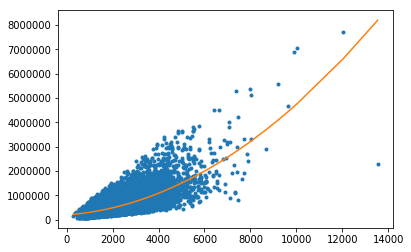

In [65]:
plt.plot(poly2_df['power_1'],output,
         '.',
         poly2_df['power_1'], 
         lm.predict(inputf),
         '-')

#### Polynomial with 3 degrees

In [66]:
poly3_df = polynomial_df(sales['sqft_living'], 3)
my_features = ['power_1','power_2','power_3'] # get the name of the features
poly3_df['price'] = sales['price'] # add price to the data since it's the target
poly3_df = poly3_df[['power_1','power_2','power_3', 'price']] .sort_values(['power_1','power_2','power_3', 'price'])
poly3_df.head()

,power_1,power_2,power_3,price
19452,290,84100,24389000,142000.0
15381,370,136900,50653000,276000.0
860,380,144400,54872000,245000.0
18379,384,147456,56623104,265000.0
4868,390,152100,59319000,228000.0


In [67]:
inputf = np.array(poly3_df[my_features])
output = np.array(poly3_df['price'])    

In [68]:
lm3 = LinearRegression()

In [69]:
lm3.fit(inputf,output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
coeff_df3 = pd.DataFrame(lm3.coef_,['power_1', 'power_2','power_3'],columns=['Coefficient'])
coeff_df3

,Coefficient
power_1,-90.181986
power_2,0.087047
power_3,-0.000004


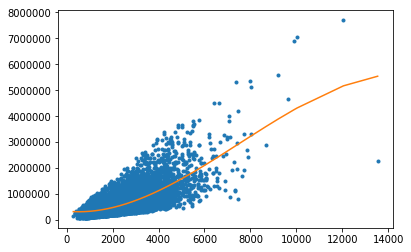

In [71]:
plt.plot(poly3_df['power_1'],poly3_df['price'],'.',
        poly3_df['power_1'], lm3.predict(inputf),'-')

#### Polynomial with 15 degrees

In [72]:
poly15_df = polynomial_df(sales['sqft_living'], 15)


In [73]:
my_features = []
for i in range(1,15):
    my_features.append('power_' + str(i))

In [74]:
poly15_df['price'] = sales['price'] # add price to the data since it's the target
poly15_df = poly15_df[my_features+['price']].sort_values(my_features+['price'])
poly15_df.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,price
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,0,0,0,0,0,0,0,142000.0
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,0,0,0,0,0,0,0,276000.0
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,0,0,0,0,0,0,0,245000.0
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,0,0,0,0,0,0,0,265000.0
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066789999872,0,0,0,0,0,0,0,228000.0


In [75]:
inputf = np.array(poly15_df[my_features])
output = np.array(poly15_df['price'])    

In [76]:
lm15 = LinearRegression()

In [77]:
lm15.fit(inputf,output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
coeff_df15 = pd.DataFrame(lm15.coef_,my_features,columns=['Coefficient'])
coeff_df15

,Coefficient
power_1,1.665171e-05
power_2,4.146970e-02
power_3,5.095323e-06
power_4,-4.822522e-10
power_5,-3.170117e-14
power_6,8.423965e-16
power_7,-2.091222e-14
power_8,0.000000e+00
power_9,0.000000e+00
power_10,0.000000e+00


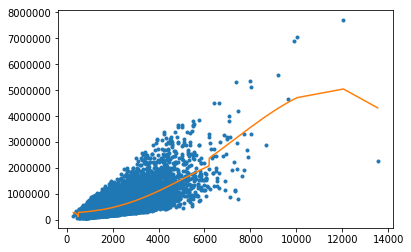

In [79]:
plt.plot(poly15_df['power_1'],poly15_df['price'],'.',
        poly15_df['power_1'], lm15.predict(inputf),'-')

## Selecting the best model

In [80]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt 

# First function
def polynomial_df(feature, degree):
    
    poly_df = pd.DataFrame()
    poly_df['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1): 
            name = 'power_' + str(power)
            poly_df[name] = feature ** power
            
    return poly_df

# Seconde function
def dataf(degree, df , newdf,output):
    
    my_features = []
    for i in range(1,degree+1):
        my_features.append('power_' + str(i))
    
    newdf['price'] = df[output] # add price to the data since it's the target
    newdf          = newdf[my_features+['price']] .sort_values(my_features+['price'])
    return(newdf,my_features)

# Third function

def fitted_model(df,Xi,Yi):
    
    X = np.array(df[Xi])
    y = np.array(df[Yi])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)

    coeff = pd.DataFrame(lm.coef_,Xi,columns=['Coefficient'])
    
    
    predictions = lm.predict(X_test)
    res         = y_test - predictions
    res = sum(res**2)
    
    # plot predictions
    #plt.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training points")
             
    return(lm,coeff,res,y_test,predictions)

In [81]:
temp0 = polynomial_df(sales['sqft_living'], 5)
temp1 = dataf(5, sales , temp0,'price')
temp = temp1[0]
result = fitted_model(temp,temp1[1],'price')
result

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
           Coefficient
 power_1  1.832139e-05
 power_2  4.538946e-02
 power_3  4.246710e-06
 power_4 -4.924980e-10
 power_5 -3.286107e-14,
 452982543183408.13,
 array([ 580000.,  482500.,  422500., ...,  675000.,  790000.,  564000.]),
 array([ 308154.15642596,  340108.11439263,  356677.40440575, ...,
         741065.86516395,  941123.50149679,  509848.73210059]))

In [82]:
result[3].argsort()

array([5786, 5898, 6395, ..., 5188, 4905, 3191], dtype=int64)

In [83]:
result = []
for i in range(1,18):
    temp0 = polynomial_df(sales['sqft_living'], i)
    temp1 = dataf(i, sales , temp0,'price')
    temp = temp1[0]
    result.append(fitted_model(temp,temp1[1],'price')[1])
    print('degree',i,'rss',result[i-1])

degree 1 rss          Coefficient
power_1   274.854756
degree 2 rss          Coefficient
power_1   109.797081
power_2     0.030122
degree 3 rss          Coefficient
power_1  -119.704213
power_2     0.100364
power_3    -0.000006
degree 4 rss           Coefficient
power_1  2.582492e+01
power_2  3.560811e-02
power_3  4.721010e-06
power_4 -4.802406e-10
degree 5 rss           Coefficient
power_1  1.832139e-05
power_2  4.538946e-02
power_3  4.246710e-06
power_4 -4.924980e-10
power_5 -3.286107e-14
degree 6 rss           Coefficient
power_1  1.868396e-05
power_2  4.650506e-02
power_3  4.017599e-06
power_4 -4.813143e-10
power_5 -3.352669e-14
power_6  1.633517e-15
degree 7 rss           Coefficient
power_1  1.859201e-05
power_2  4.635132e-02
power_3  4.052933e-06
power_4 -4.831559e-10
power_5 -3.346437e-14
power_6  1.588553e-15
power_7 -1.940550e-14
degree 8 rss           Coefficient
power_1  1.859551e-05
power_2  4.635581e-02
power_3  4.052062e-06
power_4 -4.831177e-10
power_5 -3.346313e-14
pow

### With Sickit Learn

In [84]:
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree = 3)  

In [85]:
y = np.array(sales['price'])
x = np.array(sales['sqft_living'])
X = x[:, np.newaxis]

In [86]:
X.shape

(21613, 1)

In [87]:
y.shape

(21613,)

Text(0.5,1,'Polynomial Degree = 6')

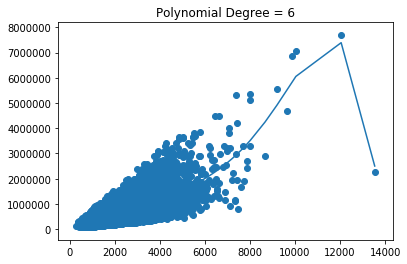

In [99]:
poly_features = PolynomialFeatures(degree = 6)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y)

pred = poly_model.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred))) # sort values for plotting
plt.plot(new_X, new_y)
plt.scatter(X,y)
plt.title("Polynomial Degree = 6")

# Ridge Regression (interpretation)

### Overfitting ridje lasso regression

In [94]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, output,alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data[output])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['sqft_living'],y_pred)
        plt.plot(data['sqft_living'],data[output],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data[output])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [100]:
#ridge_regression(sales, ['sqft_living'],'price', 1e-15, models_to_plot={})

In [96]:
temp0 = polynomial_df(sales['sqft_living'], 15)
temp = temp0.rename(columns={'power_1':'sqft_living'})
temp = temp.join(sales['price'])
temp.head()

,sqft_living,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,1180,1392400,1643032000,1938777760000,2287757756800000,2699554153024000000,0,0,0,0,0,0,0,0,0,221900.0
1,2570,6604900,16974593000,43624704010000,112115489305700000,0,0,0,0,0,0,0,0,0,0,538000.0
2,770,592900,456533000,351530410000,270678415700000,208422380089000000,0,0,0,0,0,0,0,0,0,180000.0
3,1960,3841600,7529536000,14757890560000,28925465497600000,0,0,0,0,0,0,0,0,0,0,604000.0
4,1680,2822400,4741632000,7965941760000,13382782156800000,0,0,0,0,0,0,0,0,0,0,510000.0


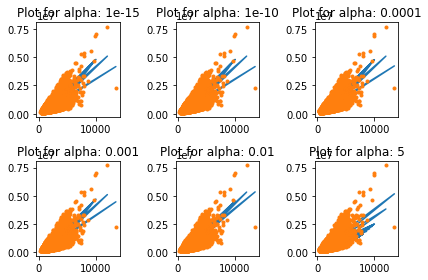

In [97]:
#Initialize predictors to be set of 15 powers of x
predictors=['sqft_living']
predictors.extend(['power_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(temp, predictors,'price' ,alpha_ridge[i], models_to_plot)

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1e-5) to make the solution numerically stable. (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights.

Hint: make sure to add 'price' column to the new SFrame before calling graphlab.linear_regression.create(). Also, make sure GraphLab Create doesn't create its own validation set by using the option validation_set=None in this call.

## Observe overfitting

In [108]:
from sklearn.cross_validation import train_test_split

In [109]:
semi_split1,semi_split2 = train_test_split(sales,test_size=0.5)

set_1, set_2= train_test_split(semi_split1, test_size=0.5)
set_3, set_4= train_test_split(semi_split2, test_size=0.5)

In [116]:
print(set_1.shape,set_2.shape,set_3.shape,set_4.shape)

(5403, 26) (5403, 26) (5403, 26) (5404, 26)


In [127]:
from sklearn.linear_model import LinearRegression,ridge_regression,ElasticNet,lasso_path

In [126]:
#df = polynomial_df(set_data['sqft_living'], 15).head()
#df['price'] = set_data['price']
#model = 


#def get_poly_model(set_data, l2_penalty):
#    return df, model

# Ridge Regression (gradient descent)

In [138]:
def get_numpy_data(df, features, output):
    df['constant'] = 1 
    features = ['constant'] + features 
    
    features_df = df[features]
    
    feature_matrix = np.array(features_df)
    output_sarray = df[output]
    
    output_array = np.array(output_sarray)
    return(feature_matrix, output_array)

In [139]:
feature_matrix, output_array=get_numpy_data(sales, ['sqft_living','sqft_lot'], 'price')

In [141]:
my_weights = np.array([1.,1., 10.])
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)

    return(predictions)

In [142]:
predict_output(feature_matrix, my_weights)

array([  57681.,   74991.,  100771., ...,   14521.,   25481.,   11781.])

In [143]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2 * np.dot(errors, feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * np.dot(errors, feature) + 2*(l2_penalty*weight)
    return derivative

In [144]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 

In [147]:
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20.)
print('')

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2.)

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0
